# How to use placeholder

In [2]:
import tensorflow as tf
import numpy as np

a = tf.placeholder(dtype=tf.float32, shape=[2, 1]) 
b = tf.placeholder(dtype=tf.float32, shape=[1, 2])
c = tf.matmul(a, b) 

a_input, b_input = np.array([[2], [3]]), np.array([[4, 5]])

sess = tf.Session()
c_value = sess.run(c, feed_dict={a: a_input, b: b_input})

print(c_value)

[[ 8. 10.]
 [12. 15.]]


# How to use variables

In [3]:
import tensorflow as tf
import numpy as np

a = tf.placeholder(dtype=tf.float32, shape=[None, ])
b = tf.Variable([0.])
c = tf.Variable([0.])

b = tf.add(a, 1)
c = tf.add(b, 1)

a_input = np.array([2.])
b_input = np.array([3.])

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
b_value = sess.run(b, feed_dict={a: a_input})
c_value = sess.run(c, feed_dict={a: a_input})
c1_value = sess.run(c, feed_dict={b: b_input})
print(b_value)
print(c_value)
print(c1_value)

[3.]
[4.]
[4.]


# Activation function

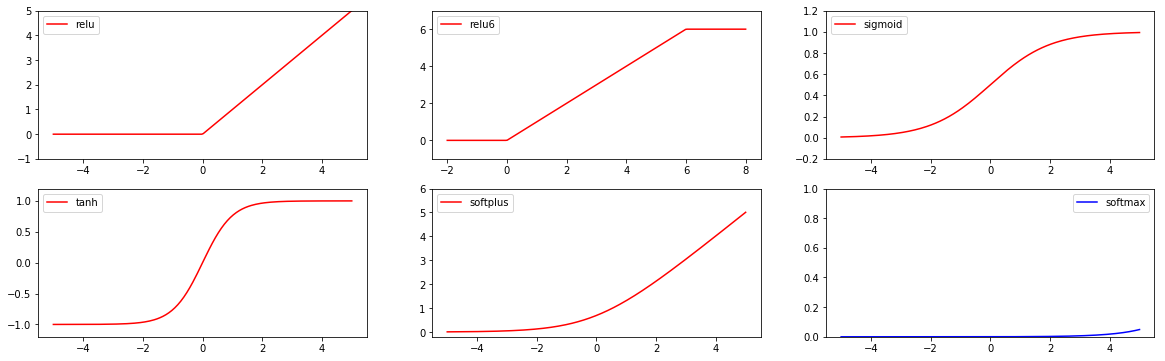

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# fake data
x = np.linspace(-5, 5, 200) 
x1 = np.linspace(-2, 8, 200) 

# following are popular activation functions
y_relu = tf.nn.relu(x)
y_relu6 = tf.nn.relu6(x1)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)
y_softmax = tf.nn.softmax(x)

sess = tf.Session()
y_relu, y_relu6, y_sigmoid, y_tanh, y_softplus, y_softmax = \
sess.run([y_relu, y_relu6, y_sigmoid, y_tanh, y_softplus, y_softmax])

# plt to visualize these activation function
plt.figure(1, figsize=(20, 6))

plt.subplot(231)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(232)
plt.plot(x1, y_relu6, c='red', label='relu6')
plt.ylim((-1, 7))
plt.legend(loc='best')

plt.subplot(233)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(234)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(235)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='upper left')

plt.subplot(236)
plt.plot(x, y_softmax, c='blue', label='softmax')
plt.ylim((0, 1))
plt.legend(loc='best')

plt.show()

# Simple regression

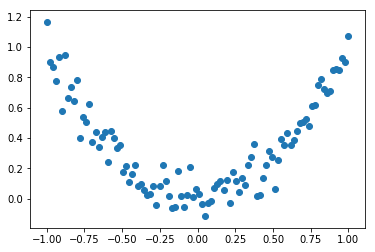

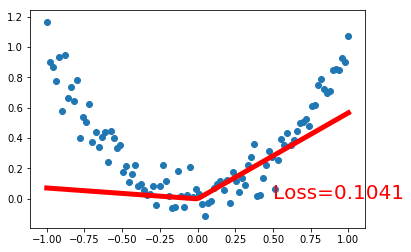

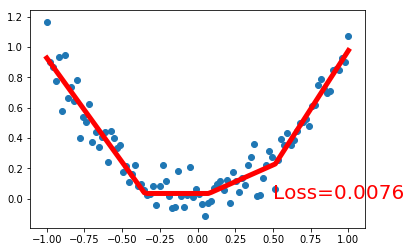

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]      # shape (100, 1) >> 2-d plot frame with x-axis from 0 to 1
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                      # shape (100, 1) + some noise

# plot data
plt.scatter(x, y)
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer [100, 1] >> [100, 10] 
output = tf.layers.dense(l1, 1)                     # output layer [100, 10] >> [100, 1]

loss = tf.losses.mean_squared_error(tf_y, output)       # compute loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.1)   # define optimizer, learning rate
train_op = optimizer.minimize(loss)                     # minimize loss

sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # something about plotting

for step in range(1000):
    
    # train and net output
    _, l, sample, hidden, pred = sess.run([train_op, loss, tf_x, l1, output], {tf_x: x, tf_y: y})
    
    if step % 500 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y) # train data
        plt.plot(x, pred, 'r-', lw=5) # predict data
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# Simple classfication

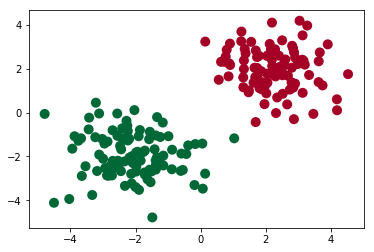

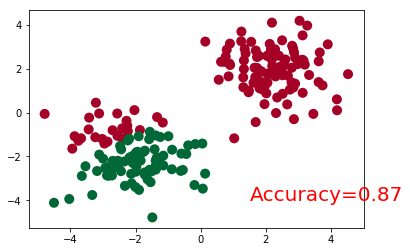

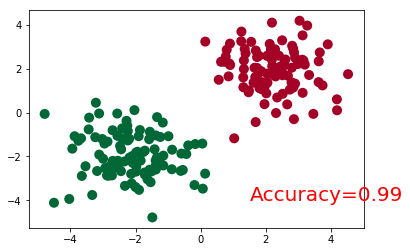

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, )
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100, )
x = np.vstack((x0, x1))                 # combine data: shape (200, 2) + some noise
y = np.hstack((y0, y1))                 # combine data: shape (200, )

# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

# prepare for NN
tf_x = tf.placeholder(tf.float32, x.shape)   # input x (200, 2)
tf_y = tf.placeholder(tf.int32, y.shape)     # input y (200,)

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer [200, 2] >> [200, 10]
output = tf.layers.dense(l1, 2)                     # output layer [200, 10] >> [200, 2]

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)   # compute cost
accuracy = tf.metrics.accuracy( # return (acc, update_op), and create 2 local variables
    labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(loss)

sess = tf.Session()   # control training and others
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)     # initialize var in graph

plt.ion()   
for step in range(1000):
    
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    
    if step % 500 == 0:        
        # plot and show learning process
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# Drop Out

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]      # shape (100, 1) >> 2-d plot frame with x-axis from 0 to 1
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                      # shape (100, 1) + some noise

tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# networks parameters
net_weights = tf.get_collection(tf.GraphKeys.WEIGHTS)
net_biases = tf.get_collection(tf.GraphKeys.BIASES)

# neural network layers
l1 = tf.layers.dense(tf_x, 200, tf.nn.relu) # hidden layer [100, 1] >> [100, 200] 
l2 = tf.layers.dropout(l1, rate=0.1)     # dropout layer [100, 200] >> [100, 200] drop 10% of weights
output = tf.layers.dense(l2, 1)          # output layer [100, 180] >> [100, 1]

loss = tf.losses.mean_squared_error(tf_y, output)       # compute loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.1)   # define optimizer, learning rate
train_op = optimizer.minimize(loss)                     # minimize loss

sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

for step in range(100):
    
    # train and net output
    _, hidden, drop, get_weights = sess.run([train_op, l1, l2, net_weights], {tf_x: x, tf_y: y})
    
    if step % 100 == 0:
        print(tf_x.shape)
        print(hidden.shape)
        print(drop.shape)
        print(output.shape)
        print('')

(100, 1)
(100, 200)
(100, 200)
(100, 1)



# Save and Reload

This is save
This is reload
INFO:tensorflow:Restoring parameters from ./weight/10000.cptk


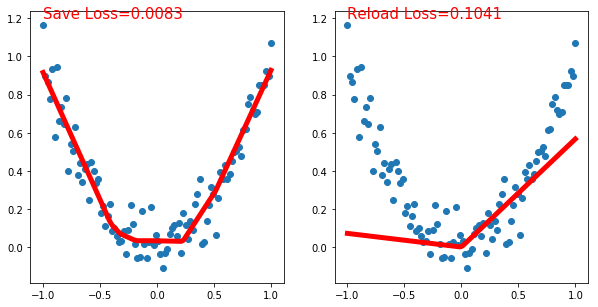

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)     # input x
    tf_y = tf.placeholder(tf.float32, y.shape)     # input y    
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)      # hidden layer
    o = tf.layers.dense(l, 1)                      # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  
    saver = tf.train.Saver(max_to_keep=5)  

    for step in range(10000):                             
        sess.run(train_op, {tf_x: x, tf_y: y})
        
        if (step+1) % 5000 == 0:
            saver.save(sess, './weight/' + str(step+1) + '.cptk', write_meta_graph=False)

    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})


def reload():
    print('This is reload')
    
    # build entire net again and restore
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o_ = tf.layers.dense(l_, 1)                     # output layer
    loss_ = tf.losses.mean_squared_error(tf_y, o_)   # compute cost

    sess = tf.Session()
    saver = tf.train.Saver() 
    path = './' + 'weight'
    #saver.restore(sess, tf.train.latest_checkpoint(path))
    saver.restore(sess, './weight/10000.cptk')

    # plotting
    pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()

save()

# destroy previous net
tf.reset_default_graph()

reload()

# Optimizer

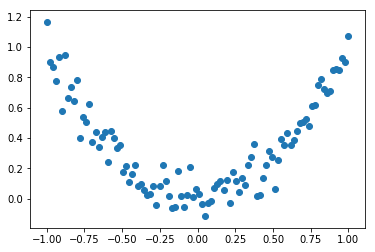

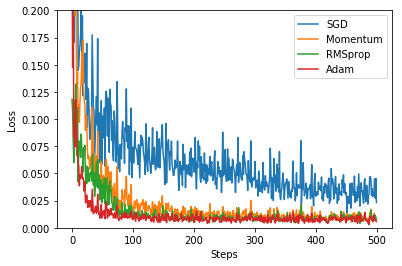

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

LR = 0.01
BATCH_SIZE = 32

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# plot dataset
plt.scatter(x, y)
plt.show()

# default network
class Net:
    def __init__(self, opt, **kwargs):
        
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)

# different nets
net_SGD         = Net(tf.train.GradientDescentOptimizer)
net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop     = Net(tf.train.RMSPropOptimizer)
net_Adam        = Net(tf.train.AdamOptimizer)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[], [], [], []]   # record loss

# training
for step in range(500):          # for each training step
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]

    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)     # loss recoder

# plot loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

# Tensorboard

In [11]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

with tf.variable_scope('Inputs'):
    tf_x = tf.placeholder(tf.float32, x.shape, name='x')
    tf_y = tf.placeholder(tf.float32, y.shape, name='y')

with tf.variable_scope('Net'):
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu, name='hidden_layer')
    output = tf.layers.dense(l1, 1, name='output_layer')

    # add to histogram summary
    tf.summary.histogram('h_out', l1)
    tf.summary.histogram('pred', output)

loss = tf.losses.mean_squared_error(tf_y, output, scope='loss')
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
tf.summary.scalar('loss', loss)     # add loss to scalar summary

sess = tf.Session()
sess.run(tf.global_variables_initializer())

writer = tf.summary.FileWriter('./log', sess.graph)     # write to file
merge_op = tf.summary.merge_all()                       # operation to merge all summary

for step in range(100):
    # train and net output
    _, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})
    writer.add_summary(result, step)

# Dataset

In [12]:
import tensorflow as tf
import numpy as np

# load your data or create your data in here
npx = np.random.uniform(-1, 1, (1000, 1))                           # x data (1000,1)
npy = np.power(npx, 2) + np.random.normal(0, 0.1, size=npx.shape)   # y data (1000,1)
npx_train, npx_test = np.split(npx, [800])                          # train data (800,1) and test data (200,1)
npy_train, npy_test = np.split(npy, [800])

# use placeholder, later you may need different data, pass the different data into placeholder
tfx = tf.placeholder(npx_train.dtype, npx_train.shape)
tfy = tf.placeholder(npy_train.dtype, npy_train.shape)

# create dataloader
dataset = tf.data.Dataset.from_tensor_slices((tfx, tfy))
dataset = dataset.shuffle(buffer_size=1000)       # choose data randomly from this buffer
dataset = dataset.batch(32)                       # batch size you will use
dataset = dataset.repeat(3)                       # repeat for 3 epochs
iterator = dataset.make_initializable_iterator()  # later we have to initialize this one

# your network
bx, by = iterator.get_next()                      # use batch to update
l1 = tf.layers.dense(bx, 10, tf.nn.relu)
out = tf.layers.dense(l1, npy.shape[1])
loss = tf.losses.mean_squared_error(by, out)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
# need to initialize the iterator in this case
sess.run([iterator.initializer, tf.global_variables_initializer()], feed_dict={tfx: npx_train, tfy: npy_train})

for step in range(201):
    try:
        _, trainl = sess.run([train, loss])                       # train
        if step % 10 == 0:
            testl = sess.run(loss, {bx: npx_test, by: npy_test})    # test
            print('step: %i/200' % step, '|train loss:', trainl, '|test loss:', testl)
    except tf.errors.OutOfRangeError:     # if training takes more than 3 epochs, training will be stopped
        print('Finish the last epoch.')
        break

step: 0/200 |train loss: 0.29207167 |test loss: 0.19249298
step: 10/200 |train loss: 0.10077437 |test loss: 0.103515126
step: 20/200 |train loss: 0.098613515 |test loss: 0.07912445
step: 30/200 |train loss: 0.07298069 |test loss: 0.066270374
step: 40/200 |train loss: 0.050448805 |test loss: 0.057739865
step: 50/200 |train loss: 0.04709275 |test loss: 0.05346017
step: 60/200 |train loss: 0.041639253 |test loss: 0.046554185
step: 70/200 |train loss: 0.022397514 |test loss: 0.044929348
Finish the last epoch.


# Softmax Regression on MNIST dataset

In [14]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10])  # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)

new_W = W.assign(W - learning_rate * grad_W)
new_b = b.assign(b - learning_rate * grad_b)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Fit training using batch data
            _, _,  c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs, y: batch_ys})           
            
            # Compute average loss
            avg_cost += c / total_batch
        
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.183603946
Epoch: 0002 cost= 0.665320146
Epoch: 0003 cost= 0.552879977
Epoch: 0004 cost= 0.498686065
Epoch: 0005 cost= 0.465506727
Epoch: 0006 cost= 0.442582191
Epoch: 0007 cost= 0.425532841
Epoch: 0008 cost= 0.412185642
Epoch: 0009 cost= 0.401376112
Epoch: 0010 cost= 0.392403706
Optimization Finished!
Accuracy: 0.87266666


# tf.gradient

In [15]:
import tensorflow as tf
import numpy as np

x = tf.Variable(2.0)
y = x**2 + x - 1

grad1 = tf.gradients(y, x)         # 一阶导
grad2 = tf.gradients(grad1[0], x)  # 二阶导
grad3 = tf.gradients(grad2[0], x)  # 三阶导

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(grad1[0]))
    print(sess.run(grad2[0]))
    print(sess.run(grad3[0]))

5.0
2.0
0.0


In [16]:
import tensorflow as tf

X = tf.Variable(tf.random_normal([3, 3]))
y = X**2 + X - 1

grad = tf.gradients(y, X)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    grad_value = sess.run(grad)
    print('X:', sess.run(X))
    print('')
    print('y:', sess.run(y))
    print('')
    print('grad:', grad_value[0])
    print('grad.shape:', grad_value[0].shape)

X: [[-1.1813587  -1.0633078   1.0094525 ]
 [ 0.05275223 -0.11269758 -1.1074392 ]
 [ 0.09235554 -0.67967147  1.184053  ]]

y: [[-0.78575027 -0.9326844   1.0284467 ]
 [-0.944465   -1.0999968  -0.8810177 ]
 [-0.8991149  -1.2177181   1.5860343 ]]

grad: [[-1.3627174  -1.1266155   3.018905  ]
 [ 1.1055045   0.77460486 -1.2148783 ]
 [ 1.1847111  -0.35934293  3.368106  ]]
grad.shape: (3, 3)


In [17]:
import tensorflow as tf

X = tf.Variable(tf.random_normal([3,1]))
y = X**2 + X - 1

grad = tf.gradients(y, X)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    grad_value = sess.run(grad)
    print('X:', sess.run(X))
    print('X.shape:', sess.run(X).shape)
    print('')
    print('y:', sess.run(y))
    print('y.shape:', sess.run(y).shape)
    print('')
    print('grad:', grad_value)
    print('grad.shape:', np.array(grad_value).shape)
    print('')
    print('grad[0]:', grad_value[0])
    print('grad[0].shape:', grad_value[0].shape)

X: [[-1.423778  ]
 [-0.20031379]
 [-0.4870847 ]]
X.shape: (3, 1)

y: [[-0.3966341]
 [-1.1601882]
 [-1.2498332]]
y.shape: (3, 1)

grad: [array([[-1.8475561 ],
       [ 0.5993724 ],
       [ 0.02583063]], dtype=float32)]
grad.shape: (1, 3, 1)

grad[0]: [[-1.8475561 ]
 [ 0.5993724 ]
 [ 0.02583063]]
grad[0].shape: (3, 1)


In [18]:
import tensorflow as tf

a = tf.get_variable('a', shape=[2])
b = tf.get_variable('b', shape=[2])
c = tf.get_variable('c', shape=[2])

x = a + b + c 
y = a + b

grads = tf.gradients(ys = [x, y], xs = [a, b, c], grad_ys = None)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(grads))

[array([2., 2.], dtype=float32), array([2., 2.], dtype=float32), array([1., 1.], dtype=float32)]


In [19]:
import tensorflow as tf

a = tf.get_variable('a1', shape=[2])
b = tf.get_variable('b1', shape=[2])
c = tf.get_variable('c1', shape=[2])

x = a + b + c 
y = a + b

grads = tf.gradients(ys = [x, y], xs = [a, b, c], grad_ys = [[1, 2], [2, 4]])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(grads))

[array([3, 6]), array([3, 6]), array([1, 2])]


# DQN: Get Target Q'(s',a'), (a') from network policy without noise 

In [20]:
import tensorflow as tf
import numpy as np

sess = tf.Session()

q_ = np.arange(12).reshape(4,3)
print('q_:', q_)
print('')

r = np.array([1,1,1,1])
print('r:', r.shape)
print('')

q_target = r + 1 * tf.reduce_max(q_, axis=1)
print('q_target:', sess.run(q_target))
print('')

q_: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

r: (4,)

q_target: [ 3  6  9 12]



# DQN: Get Predict Q(s, a), (a) from behavior policy with noise

In [21]:
import tensorflow as tf
import numpy as np

sess = tf.Session()

arr = np.arange(12).reshape(4, 3)
print('arr:', arr)
print('')

a = tf.range(4,dtype=tf.int32)
print('a:', sess.run(a))
print('')

b = np.array([1,1,2,2]).astype(int)
print('b:', b)
print('')

c = tf.stack([a, b], axis=1)
print('c:', sess.run(c))
print('')

x = tf.gather_nd(params=arr, indices=c)
#x = arr[a,b]
print('x:', sess.run(x))

arr: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

a: [0 1 2 3]

b: [1 1 2 2]

c: [[0 1]
 [1 1]
 [2 2]
 [3 2]]

x: [ 1  4  8 11]


In [22]:
import numpy as np

arr = np.arange(12).reshape(4, 3)
print('arr:', arr)
print('')

a = np.arange(4)
print('a:', a)
print('')

b = np.array([1,1,2,2])
print('b:', b)
print('')

x = arr[a,b]
print('x:', x)

arr: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

a: [0 1 2 3]

b: [1 1 2 2]

x: [ 1  4  8 11]
